In [ ]:
#YASEEN MOHAMMED- yam200000
#UMAR ALI-SALEEM - uxa190000

In [ ]:
import os
os.chdir("/usr")


In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz -P /usr
!tar -xzf ta-lib-0.4.0-src.tar.gz

--2023-12-03 02:35:41--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-12-03 02:35:41--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://newcontinuum.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-12-03 02:35:41--  http://newcontinuum.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving newco

In [ ]:
import os
os.chdir('/usr/ta-lib')

In [ ]:
!./configure --prefix=/usr
!make
!sudo make install

checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
checking for a thread-safe mkdir -p... /usr/bin/mkdir -p
checking for gawk... no
checking for mawk... mawk
checking whether make sets $(MAKE)... yes
checking for gcc... gcc
checking for C compiler default output file name... a.out
checking whether the C compiler works... yes
checking whether we are cross compiling... no
checking for suffix of executables... 
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking for style of include used by make... GNU
checking dependency style of gcc... gcc3
checking build system type... x86_64-unknown-linux-gnu
checking host system type... x86_64-unknown-linux-gnu
checking for a sed that does not truncate output... /usr/bin/sed
checking for grep that handles long lines and -e... /usr/bin/grep
chec

In [ ]:
!pip install TA-Lib

In [ ]:
import yfinance as yf
import pandas as pd
import talib as ta
import matplotlib.pyplot as plt


# Download the historical data for the asset
stock = yf.Ticker("SPY")
data = stock.history(period="5y")

# Calculate the simple moving average (SMA)
data["sma_10"] = ta.SMA(data["Close"], timeperiod=10)
data["sma_50"] = ta.SMA(data["Close"], timeperiod=50)
data["sma_200"] = ta.SMA(data["Close"], timeperiod=200)

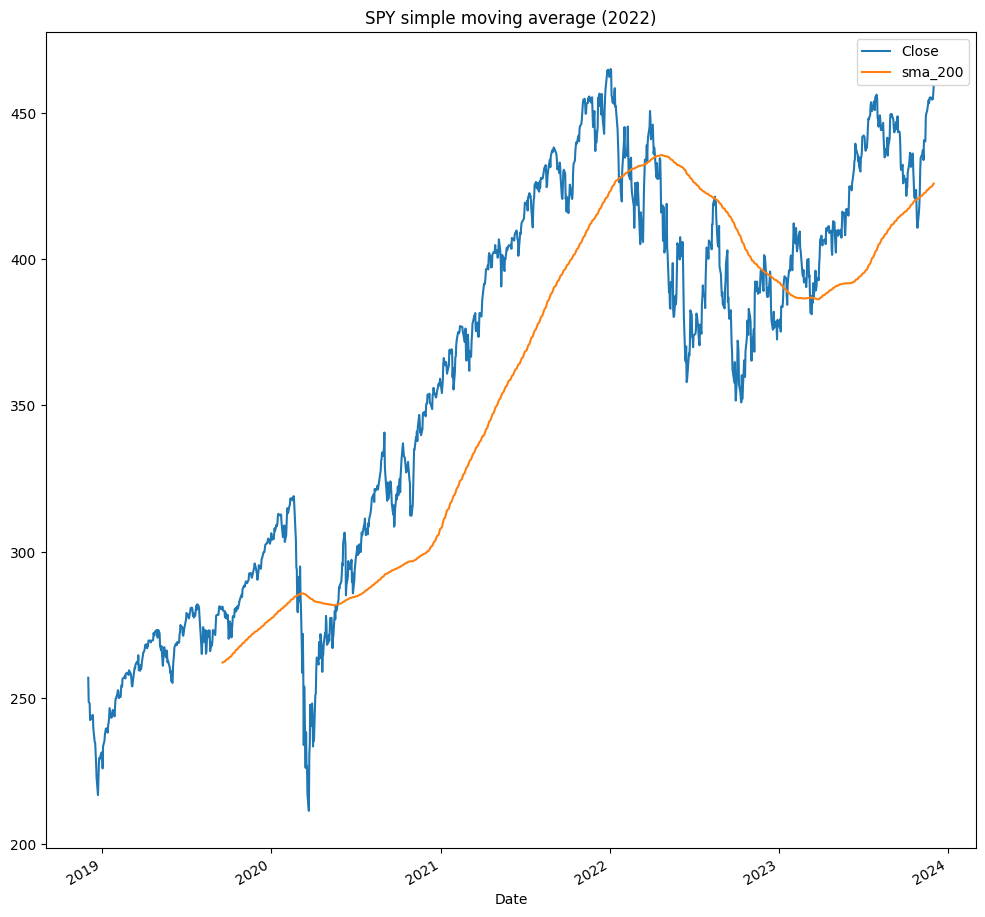

In [ ]:
data['SMA50'] = ta.SMA(data['Close'],50)
data[['Close', 'sma_200']].plot(figsize=(12,12))
plt.title("SPY simple moving average (2022)")
plt.show()

In [ ]:
data['aboveSMA'] = data['Close'] > data['SMA50']

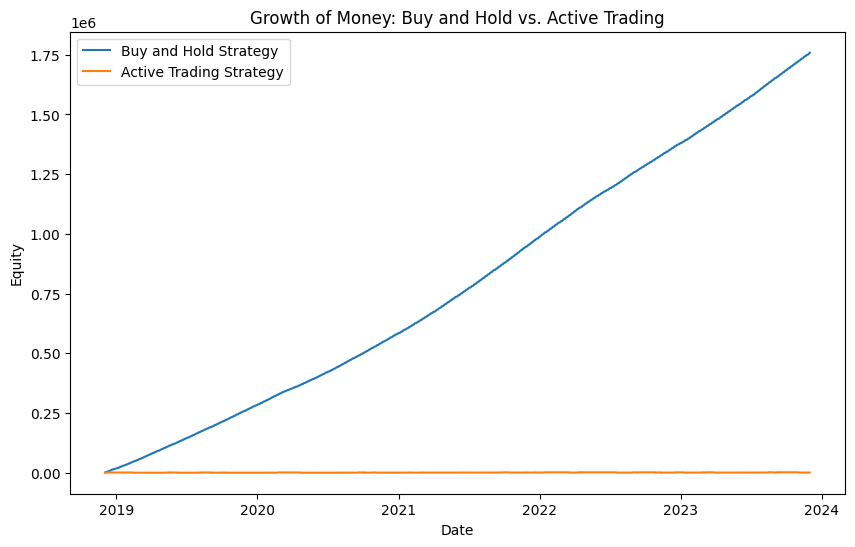

Buy and Hold Strategy:
Total Equity at the end of 30 years: $ 1758634.43197587
Annual Return:  388.50956443774163 %

Active Trading Strategy:
Total Equity at the end of 30 years: $ 786.8220382718323
Annual Return:  -99.78143832270227 %


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' contains the provided DataFrame

# Simulation Setup
equity_bh = 0  # Buy and Hold strategy equity
equity_at = 0  # Active Trading strategy equity
monthly_investment = 1000
invested = False
current_cash = 0

# Lists to store equity values over time
equity_bh_values = []
equity_at_values = []

# Implement Buy and Hold Strategy
for ind in range(len(data)):
    equity_bh += monthly_investment * (data['Close'][ind] / data['Close'][0])  # Adjust for changes in stock value
    equity_bh_values.append(equity_bh)  # Store equity values over time

# Implement Active Trading Strategy
for ind in range(len(data)):
    smaCross = data['Close'][ind] > data['sma_50'][ind]
    if smaCross and not invested:
        current_cash -= monthly_investment
        invested = True
    elif not smaCross and invested:
        current_cash += monthly_investment
        invested = False
    equity_at = current_cash + (monthly_investment * (data['Close'][ind] / data['Close'][0]))  # Adjust for changes in stock value
    equity_at_values.append(equity_at)  # Store equity values over time

# Calculate Metrics
total_equity_bh = equity_bh_values[-1]  # Total equity at the end of 30 years for Buy and Hold
annual_return_bh = ((total_equity_bh - 12 * monthly_investment * 30) / (12 * monthly_investment * 30)) * 100

total_equity_at = equity_at_values[-1]  # Total equity at the end of 30 years for Active Trading
annual_return_at = ((total_equity_at - 12 * monthly_investment * 30) / (12 * monthly_investment * 30)) * 100

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data.index, equity_bh_values, label='Buy and Hold Strategy')
plt.plot(data.index, equity_at_values, label='Active Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Equity')
plt.title('Growth of Money: Buy and Hold vs. Active Trading')
plt.legend()
plt.show()

# Display Metrics
print("Buy and Hold Strategy:")
print("Total Equity at the end of 30 years: $", total_equity_bh)
print("Annual Return: ", annual_return_bh, "%")

print("\nActive Trading Strategy:")
print("Total Equity at the end of 30 years: $", total_equity_at)
print("Annual Return: ", annual_return_at, "%")
